[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

       happy       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       0.0
         sad       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



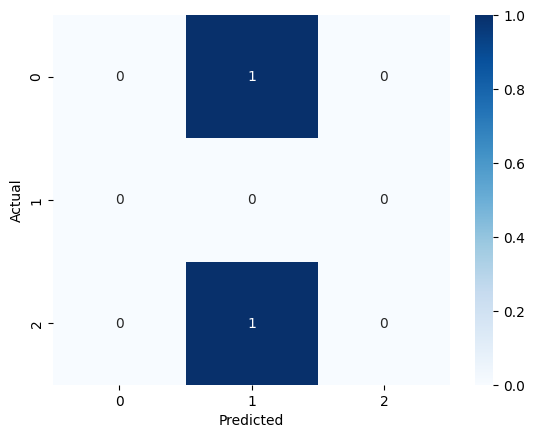


🔹 Emotion Detection System 🔹

Enter your text (type 'exit' to stop): I am very happy today
Predicted Emotion: happy

Enter your text (type 'exit' to stop): I am not feeling well
Predicted Emotion: neutral

Enter your text (type 'exit' to stop): i am sad 
Predicted Emotion: neutral

Enter your text (type 'exit' to stop): I am feeling sad
Predicted Emotion: sad


In [ ]:
!pip install nltk scikit-learn pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')
from nltk.corpus import stopwords
data = {
    "text": [
    ],
    "emotion": [
        "happy", "sad", "angry", "sad", "surprised",
        "neutral", "angry", "happy", "neutral"
    ]
}

df = pd.DataFrame(data)
df.head()

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)
df.head()

X = df['clean_text']
y = df['emotion']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

def predict_emotion(text):
    text = clean_text(text)
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)
    return prediction[0]
print("\n🔹 Emotion Detection System 🔹")

while True:
    user_text = input("\nEnter your text (type 'exit' to stop): ")

    if user_text.lower() == 'exit':
        print("Thank you! Program ended.")
        break

    emotion = predict_emotion(user_text)
    print("Predicted Emotion:", emotion)

